In [32]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

df = pd.read_csv('Crimes_-_2001_to_Present.csv.crdownload')

cbdf = pd.read_csv('chibulls_rawyearstats - sportsref_download (1).csv')

In [10]:
print(df.shape)

(7165841, 22)


In [33]:
print(cbdf.shape)

(54, 19)


In [11]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.00,45.00,11,nan,nan,2001,08/05/2017 03:50:08 PM,nan,nan,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.00,73.00,02,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.00,70.00,05,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.00,42.00,06,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.00,32.00,02,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN


# Yearly Crimes Exploration

In [15]:
crime_series = df.groupby(["Year"]).size()
crime_df = crime_series.to_frame()
crime_df

,0
Year,
2001,485779
2002,486762
2003,475960
2004,469395
2005,453731
2006,448136
2007,437039
2008,427095
2009,392762


The cell above makes an aggregation of cases per year in chronological order.

In [ ]:
df["Year"].value_counts()

This cell above sorts the number of cases per year in descending order so the data is not in chronological order anymore.

In [ ]:
df["Year"].min()

This is to be expected since the minimum value in the Year column would be 2001.

In [ ]:
df["Year"].max()

This is also to be expected since the maximum value in the Year column would be 2020.

In [ ]:
df["Year"].count()

This is to be expected since this value matches the 7165841 you get when you do print(df.shape).

In [ ]:
df.groupby(["Year"]).count()

This looks correct. Most fields have an entry and are aggregated to the total number of cases valid in that year.

# Looking at crimes where an arrest occurred

In [8]:
arrested_query = df.query("Arrest == True")
arrested_series = arrested_query.groupby(["Year"]).size()
arrested_df = arrested_series.to_frame()
arrested_df

,0
Year,
2001,141910
2002,141555
2003,141577
2004,144690
2005,140902
2006,135394
2007,131862
2008,109973
2009,110784


In [ ]:
arrested_df.describe()

### Now we want to see the % of crimes where arrests occurred...

In [16]:
df_joined = crime_df.join(arrested_df)
df_joined

ValueError: columns overlap but no suffix specified: RangeIndex(start=0, stop=1, step=1)

In [83]:
df_merged = crime_df.merge(arrested_df, on="Year")
df_merged = df_merged.rename(columns = { "0_x" : "Total Crimes", "0_y" : "Total Arrests" })
df_merged

Index(['Total Crimes', 'Total Arrests'], dtype='object')

In [86]:
df_merged["% of Crimes Resulting in Arrests"] = df_merged["Total Arrests"].divide(df_merged["Total Crimes"])
df_merged

,Total Crimes,Total Arrests,% of Crimes Resulting in Arrests
Year,,,
2001,485779,141910,0.29
2002,486762,141555,0.29
2003,475960,141577,0.30
2004,469395,144690,0.31
2005,453731,140902,0.31
2006,448136,135394,0.30
2007,437039,131862,0.30
2008,427095,109973,0.26
2009,392762,110784,0.28


In [30]:
df_merged.describe()

,Total Crimes,Total Arrests,% of Crimes Resulting in Arrests
count,20.00,20.00,20.00
mean,"358,292.05","97,805.45",0.26
std,"102,297.06","38,355.96",0.04
min,"117,829.00","19,543.00",0.17
25%,"269,190.25","66,316.25",0.25
50%,"361,131.50","98,378.50",0.28
75%,"449,534.75","136,771.00",0.29
max,"486,762.00","144,690.00",0.31


# Chicago Bulls Data

In [34]:
project_df = cbdf[:20]

In [35]:
project_df.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Unnamed: 8,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Unnamed: 15,Playoffs,Coaches,Top WS
0,2019-20,NBA,Chicago Bulls,22,43,0.34,3rd of 5,-3.85,nan,99.70,-0.60,106.70,-3.80,109.80,-0.70,nan,NaN,J. Boylen (22-43),Z. LaVine (4.0)
1,2018-19,NBA,Chicago Bulls,22,60,0.27,4th of 5,-8.32,nan,99.00,-1.00,104.80,-5.60,113.20,2.80,nan,NaN,"F. Hoiberg (5-19), J. Boylen (17-41)",R. Arcidiacono (3.7)
2,2017-18,NBA,Chicago Bulls,27,55,0.33,5th of 5,-6.84,nan,98.30,1.00,103.80,-4.80,110.90,2.30,nan,NaN,F. Hoiberg (27-55),B. Portis (3.5)
3,2016-17,NBA,Chicago Bulls*,41,41,0.50,4th of 5,0.03,nan,95.30,-1.10,107.40,-1.40,107.00,-1.80,nan,Lost E. Conf. 1st Rnd.,F. Hoiberg (41-41),J. Butler (13.8)
4,2015-16,NBA,Chicago Bulls,42,40,0.51,4th of 5,-1.46,nan,95.70,-0.10,105.00,-1.40,106.50,0.10,nan,NaN,F. Hoiberg (42-40),J. Butler (9.1)


In [36]:
project_df.columns

Index(['Season', 'Lg', 'Team', 'W', 'L', 'W/L%', 'Finish', 'SRS', 'Unnamed: 8',
       'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg',
       'Unnamed: 15', 'Playoffs', 'Coaches', 'Top WS'],
      dtype='object')

# W/L% Exploration

In [129]:
project_df["W/L%"]

0    0.34
1    0.27
2    0.33
3    0.50
4    0.51
5    0.61
6    0.58
7    0.55
8    0.76
9    0.76
10   0.50
11   0.50
12   0.40
13   0.60
14   0.50
15   0.57
16   0.28
17   0.37
18   0.26
19   0.18
Name: W/L%, dtype: float64

In [40]:
project_df["W/L%"].value_counts()

0.50    4
0.33    1
0.34    1
0.28    1
0.26    1
0.18    1
0.76    1
0.61    1
0.76    1
0.57    1
0.55    1
0.58    1
0.40    1
0.37    1
0.60    1
0.51    1
0.27    1
Name: W/L%, dtype: int64

In [41]:
project_df["W/L%"].value_counts

<bound method IndexOpsMixin.value_counts of 0    0.34
1    0.27
2    0.33
3    0.50
4    0.51
5    0.61
6    0.58
7    0.55
8    0.76
9    0.76
10   0.50
11   0.50
12   0.40
13   0.60
14   0.50
15   0.57
16   0.28
17   0.37
18   0.26
19   0.18
Name: W/L%, dtype: float64>

In [42]:
project_df["W/L%"].max()

0.758

In [43]:
project_df["W/L%"].min()

0.183

In [37]:
project_df.groupby(["W/L%"]).size()

W/L%
0.18    1
0.26    1
0.27    1
0.28    1
0.33    1
0.34    1
0.37    1
0.40    1
0.50    4
0.51    1
0.55    1
0.57    1
0.58    1
0.60    1
0.61    1
0.76    1
0.76    1
dtype: int64

In [39]:
project_df["W/L%"].describe()

count   20.00
mean     0.47
std      0.16
min      0.18
25%      0.34
50%      0.50
75%      0.58
max      0.76
Name: W/L%, dtype: float64

# Playoff Exploration

In [46]:
project_df["Playoffs"].value_counts()

Lost E. Conf. 1st Rnd.    7
Lost E. Conf. Semis       3
Lost E. Conf. Finals      1
Name: Playoffs, dtype: int64

In [45]:
project_df["Playoffs"].value_counts

<bound method IndexOpsMixin.value_counts of 0                        NaN
1                        NaN
2                        NaN
3     Lost E. Conf. 1st Rnd.
4                        NaN
5        Lost E. Conf. Semis
6     Lost E. Conf. 1st Rnd.
7        Lost E. Conf. Semis
8     Lost E. Conf. 1st Rnd.
9       Lost E. Conf. Finals
10    Lost E. Conf. 1st Rnd.
11    Lost E. Conf. 1st Rnd.
12                       NaN
13       Lost E. Conf. Semis
14    Lost E. Conf. 1st Rnd.
15    Lost E. Conf. 1st Rnd.
16                       NaN
17                       NaN
18                       NaN
19                       NaN
Name: Playoffs, dtype: object>

In [44]:
project_df["Playoffs"].describe()

count                         11
unique                         3
top       Lost E. Conf. 1st Rnd.
freq                           7
Name: Playoffs, dtype: object

# Coaches Exploration

In [50]:
project_df["Coaches"].value_counts()

V. Del Negro (41-41)                                       2
T. Thibodeau (45-37)                                       1
B. Cartwright (4-10), P. Myers (0-2), S. Skiles (19-47)    1
F. Hoiberg (5-19), J. Boylen (17-41)                       1
J. Boylen (22-43)                                          1
S. Skiles (9-16), P. Myers (0-1), J. Boylan (24-32)        1
T. Floyd (15-67)                                           1
T. Thibodeau (48-34)                                       1
S. Skiles (47-35)                                          1
F. Hoiberg (41-41)                                         1
T. Thibodeau (50-16)                                       1
T. Thibodeau (50-32)                                       1
S. Skiles (41-41)                                          1
S. Skiles (49-33)                                          1
T. Floyd (4-21), B. Berry (0-2), B. Cartwright (17-38)     1
F. Hoiberg (27-55)                                         1
B. Cartwright (30-52)   

In [48]:
project_df["Coaches"].value_counts

<bound method IndexOpsMixin.value_counts of 0                                     J. Boylen (22-43)
1                  F. Hoiberg (5-19), J. Boylen (17-41)
2                                    F. Hoiberg (27-55)
3                                    F. Hoiberg (41-41)
4                                    F. Hoiberg (42-40)
5                                  T. Thibodeau (50-32)
6                                  T. Thibodeau (48-34)
7                                  T. Thibodeau (45-37)
8                                  T. Thibodeau (50-16)
9                                  T. Thibodeau (62-20)
10                                 V. Del Negro (41-41)
11                                 V. Del Negro (41-41)
12    S. Skiles (9-16), P. Myers (0-1), J. Boylan (2...
13                                    S. Skiles (49-33)
14                                    S. Skiles (41-41)
15                                    S. Skiles (47-35)
16    B. Cartwright (4-10), P. Myers (0-2), S. Skile...
17  

In [49]:
project_df["Coaches"].describe()

count                       20
unique                      19
top       V. Del Negro (41-41)
freq                         2
Name: Coaches, dtype: object

# Finish in Division Exploration

In [51]:
project_df["Finish"].value_counts()

4th of 5    5
2nd of 5    5
3rd of 5    3
8th of 8    3
1st of 5    2
6th of 8    1
5th of 5    1
Name: Finish, dtype: int64

In [52]:
project_df["Finish"].value_counts

<bound method IndexOpsMixin.value_counts of 0     3rd of 5
1     4th of 5
2     5th of 5
3     4th of 5
4     4th of 5
5     2nd of 5
6     2nd of 5
7     2nd of 5
8     1st of 5
9     1st of 5
10    3rd of 5
11    2nd of 5
12    4th of 5
13    3rd of 5
14    4th of 5
15    2nd of 5
16    8th of 8
17    6th of 8
18    8th of 8
19    8th of 8
Name: Finish, dtype: object>

In [53]:
project_df["Finish"].max()

'8th of 8'

The max function is interpreting the 8th of 8 as an integer so even though 8 is the max value, it's actually the inverse. The max value for this column is actually the min aka the worst finish.

In [54]:
project_df["Finish"].min()

'1st of 5'

The min function is interpreting the 1st of 5 as an integer so even though 1 is the min value, it's actually the inverse. The min value for this column is actually the max aka the best finish.

# Line Graph of Performance Over Time

Text(0, 0.5, 'Win/Loss %')

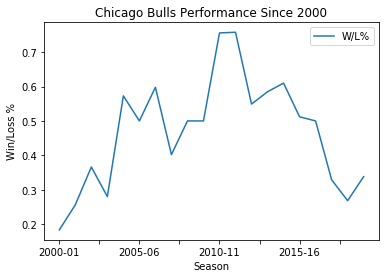

In [55]:
reversed_project_df = project_df.iloc[::-1]

reversed_project_df.plot.line(x="Season", y="W/L%", title = "Chicago Bulls Performance Since 2000")
plt.xlabel("Season")
plt.ylabel("Win/Loss %")

Used .iloc[::-1] in order to reverse the order of the years data because originally it went from present to past and we need it to be past to present.

In [126]:
project_df_winloss = project_df["W/L%"]
project_df_winloss = project_df_winloss.to_frame()
project_df_winloss = project_df_winloss.iloc[::-1]
winlosslist = project_df_winloss.values.tolist()
new_winlosslist = []
for x in winlosslist:
    for y in x:
        new_winlosslist.append(y)
print(new_winlosslist)

[0.183, 0.256, 0.366, 0.28, 0.573, 0.5, 0.598, 0.402, 0.5, 0.5, 0.7559999999999999, 0.758, 0.5489999999999999, 0.585, 0.61, 0.512, 0.5, 0.32899999999999996, 0.268, 0.33799999999999997]


### Create new column with new_winlosslist

In [130]:
df_merged["W/L%"] = new_winlosslist
df_merged

,Total Crimes,Total Arrests,% of Crimes Resulting in Arrests,W/L%
Year,,,,
2001,485779,141910,0.29,0.18
2002,486762,141555,0.29,0.26
2003,475960,141577,0.30,0.37
2004,469395,144690,0.31,0.28
2005,453731,140902,0.31,0.57
2006,448136,135394,0.30,0.50
2007,437039,131862,0.30,0.60
2008,427095,109973,0.26,0.40
2009,392762,110784,0.28,0.50
